![alt text](<Screenshot 2025-01-12 190930.png>)

Autoencoder is a type of self supervision models
- Autoencoders are neural networks that learn to reconstruct their inputs from a compressed representation. They are typically used for dimensionality reduction, denoising, and feature extraction. In this example, we will implement a simple autoencoder using PyTorch.

![alt text](<Screenshot 2025-01-12 191424.png>)

Will use MNIST Dataset for this implementation

In [20]:
import requests

def save_url_content_as_py(url, file_name):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for HTTP errors

        # Open the file with UTF-8 encoding
        with open(file_name, 'w', encoding='utf-8') as file:
            file.write(response.text)

        print(f"Content from {url} saved to {file_name} successfully.")
    except requests.RequestException as e:
        print(f"Error fetching content from {url}: {e}")
    except IOError as e:
        print(f"Error writing to file {file_name}: {e}")

# Example usage:
url = "https://raw.githubusercontent.com/moha-55/Autoencoder_with_PyTorch/refs/heads/main/utils.py"
file_name = "utils.py"

save_url_content_as_py(url, file_name)


Content from https://raw.githubusercontent.com/moha-55/Autoencoder_with_PyTorch/refs/heads/main/utils.py saved to utils.py successfully.


In [2]:
import torch
from torch import nn
import torch.nn.functional as F
from utils import View
from utils import train_network
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

m:\pytorch arabic\PyTorch_Projects_Amr_Osama\utils.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
D = 28*28 # dimension of the MNIST dataset
n = 2      # latent space dimension
c = 1      # channels
classses = 10 # no. of classes

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'"Screenshot 2025-01-12 190930.png"
device

'cuda'

In [5]:
!nvidia-smi

Thu Jan 16 12:59:02 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.61                 Driver Version: 531.61       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1060       WDDM | 00000000:01:00.0  On |                  N/A |
| N/A   50C    P8               11W /  N/A|    116MiB /  6144MiB |     23%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

1. Autoencoder is seflsupervised model (no labels) (X,y) -> (X,X)

In [6]:
class AutoEncodeDataset(Dataset):
    """"
    takes dataset (x,y) and returns(x,x)
    """
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        x,y = self.dataset.__getitem__(idx) # discard y (lables)
        return x,x


In [7]:
train_data = AutoEncodeDataset(MNIST("./", train = True, download= True, transform= transforms.ToTensor()))
test_data_xy = MNIST("./", train=False, transform=transforms.ToTensor(), download=True)
test_data_xx = AutoEncodeDataset(test_data_xy)

train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data_xx, batch_size=128)

In [8]:
x , l = next(iter(test_data_xy))
x.shape , l

(torch.Size([1, 28, 28]), 7)

In [9]:
x , x2 = next(iter(test_data_xx))
x.shape , x2.shape

(torch.Size([1, 28, 28]), torch.Size([1, 28, 28]))

# Builiding block of the autoencoder

In [10]:
def get_layer(in_size, out_size):
    "this function take input size and changes it to the output size"
    return nn.Sequential(
        nn.Linear(in_size, out_size),
        nn.BatchNorm1d(out_size),
        nn.ReLU()
    )

In [11]:
auto_encoder = nn.Sequential(
    nn.Flatten(), # 784 (28*28)
    get_layer(D, D//2),
    get_layer(D//2, D//3),
    get_layer(D//3, D//4),
    nn.Linear(D//4, n)

)

auto_decoder = nn.Sequential(
    get_layer(n, D//4),
    get_layer(D//4, D//3),
    get_layer(D//3, D//2),
    nn.Linear(D//2, D),
    View(-1,1,28,28)
)

In [12]:
auto_encode_decode = nn.Sequential(
    auto_encoder,
    auto_decoder
) 
# this is the decoder

In [13]:
train_network(model=auto_encode_decode,loss_func=nn.MSELoss(),
                train_loader=train_loader,
                test_loader=test_loader,
                epochs=10,
                device=device)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

,epoch,total time,train loss,test loss
0,0,18.371010,0.050113,0.044427
1,1,34.158051,0.043750,0.041455
2,2,45.523278,0.042120,0.040070
3,3,58.155217,0.041161,0.039278
4,4,72.548276,0.040537,0.038919
5,5,85.282615,0.040030,0.038312
6,6,98.734349,0.039471,0.038088
7,7,113.521944,0.039022,0.037656
8,8,130.375204,0.038884,0.037485
9,9,146.301161,0.038424,0.037056


In [14]:
def encode_batch(encoder,dataset_to_encode):
    """
    encoder: the PyTorch network that takes in a dataset and convers it to a new dimension
    dataset_to_encode: a PyTorch `Dataset` object that we want to convert. 

    Returns a tuple (projected, labels) where `projected` is the encoded version of the dataset,
    and `labels` are the original labels provided by the `dataset_to_encode`
    """
    projected = []
    labels = []
    # put the encoder to evaluation mode and pass it to the cpu
    encoder = encoder.eval()
    encoder = encoder.cpu()
    with torch.inference_mode():
        for x,y in DataLoader(dataset_to_encode,batch_size=128):
            z = encoder(x.cpu()) # move x to cpu just in case it wasn't already there
            projected.append(z.numpy())
            labels.append(y.cpu().numpy().ravel()) 
            
    projected = np.concatenate(projected, axis=0)
    labels = np.concatenate(labels, axis=0)

    return projected , labels

In [15]:
projected , labels = encode_batch(auto_encode_decode,test_data_xy)
projected.shape , projected.ndim

((10000, 1, 28, 28), 4)

In [16]:
projected , labels = encode_batch(auto_encoder,test_data_xy)
projected.shape , projected.ndim

((10000, 2), 2)

<Axes: >

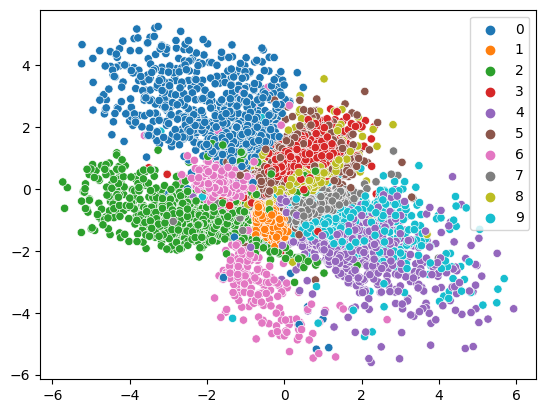

In [17]:
sns.scatterplot(
    x=projected[:,0],
    y=projected[:,1],
    hue=[str(l) for l in labels],
    hue_order=[str(i) for i in range(10)],
    legend="full")

In [18]:
def show_encode_decode(encode_decode,x):
    """
    encode_decode: the PyTorch Module that does the encoding and decoding steps at once
    x: the input to plot as is, and after encoding & decoding it
    """
    encode_decode = encode_decode.eval()
    encode_decode = encode_decode.cpu()
    with torch.inference_mode():
        x_recon = encode_decode(x.cpu())
        f , axarr = plt.subplots(1,2)
    axarr[0].imshow(x.numpy()[0,:])
    axarr[1].imshow(x_recon.numpy()[0,0,:])

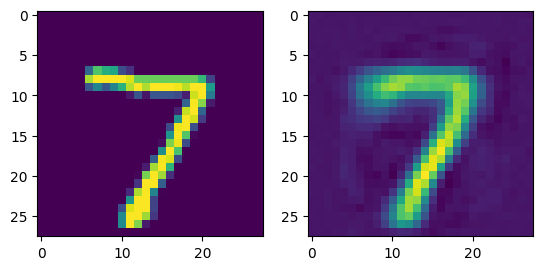

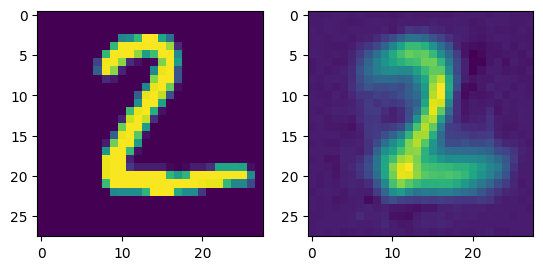

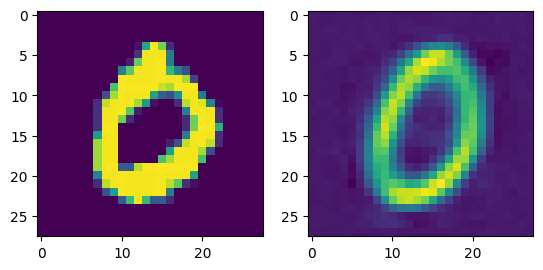

In [19]:
show_encode_decode(auto_encode_decode,test_data_xx[0][0])
show_encode_decode(auto_encode_decode,test_data_xx[1][0])
show_encode_decode(auto_encode_decode,test_data_xx[3][0])

# Try to add noise to a certain sample and see how the network works with that

In [21]:
normal = torch.distributions.Normal(0, 0.5) # mean = 0 , std = 0.5

def addNoise(x, device = 'cpu'):
    return x+normal.sample(sample_shape=torch.Size(x.shape)).to(device)

"""
    Will use this helper function to add noise to some data.
    x: the data we want to add noise to
    device: the CPU or GPU that the input is located on.
"""

'\n    Will use this helper function to add noise to some data.\n    x: the data we want to add noise to\n    device: the CPU or GPU that the input is located on.\n'

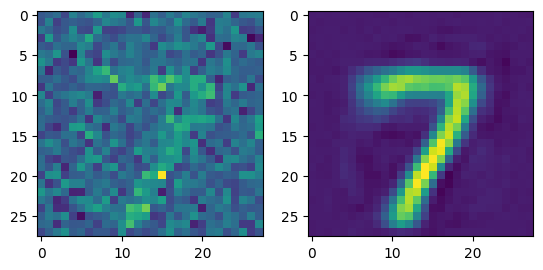

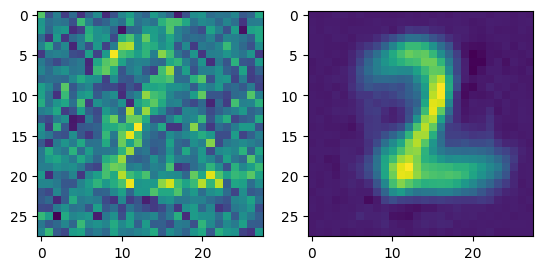

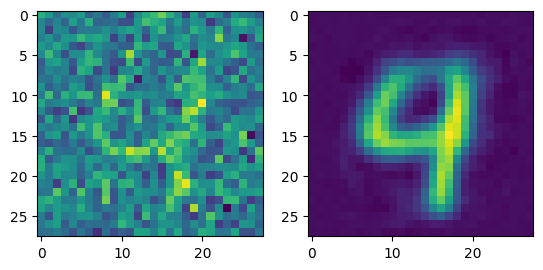

In [24]:
show_encode_decode(auto_encode_decode,addNoise(test_data_xy[0][0]))
show_encode_decode(auto_encode_decode,addNoise(test_data_xy[1][0]))
show_encode_decode(auto_encode_decode,addNoise(test_data_xy[4][0]))

# Denoising with Gaussian noise

In [42]:
# new AdditiveGaussNoise layer takes the input x in. If we are in training mode (denoted by self.training),
#  we add noise to the input; otherwise we return it unperturbed

class AddGaussianNoise(nn.Module):
    def __init__(self):
        super(AddGaussianNoise, self).__init__()

    def forward(self, x:torch.Tensor):
# Every PyTorch Module object has a self.training boolean that can be used to check if we are in training (True) or evaluation (False) mode.
        if self.training:
            return addNoise(x, device="cuda")
        else:
            return x

# Now will implment an autoencoder where instead of using bottlenck to downsize the feature D//2 we simply double the feature D*2

In [43]:
dn_auto_encoder_big = nn.Sequential(
    nn.Flatten(),
    AddGaussianNoise(),
    get_layer(D,D*2),
    get_layer(D*2,D*2),
    get_layer(D*2,D*2),
    nn.Linear(D*2,D*2)
)

dn_auto_decoder_big = nn.Sequential(
    get_layer(D*2, D*2),
    get_layer(D*2, D*2),
    get_layer(D*2, D*2),
    nn.Linear(D*2,D),
    View(-1,1,28,28)
)

In [44]:
dnauto_enode_decode_big = nn.Sequential(
    dn_auto_encoder_big,
    dn_auto_decoder_big
)

In [45]:
train_network(dnauto_enode_decode_big,
              loss_func= nn.MSELoss(),
              train_loader=train_loader,
              test_loader=test_loader,
              epochs=10,
              device=device)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

,epoch,total time,train loss,test loss
0,0,21.300168,0.032649,0.018600
1,1,43.214209,0.021083,0.014846
2,2,65.819832,0.018736,0.013074
3,3,87.666145,0.017379,0.012409
4,4,109.480685,0.016622,0.011879
5,5,132.379796,0.015998,0.011032
6,6,155.176650,0.015307,0.010524
7,7,178.522942,0.014999,0.010476
8,8,201.383598,0.014540,0.010181
9,9,224.299116,0.014106,0.009759


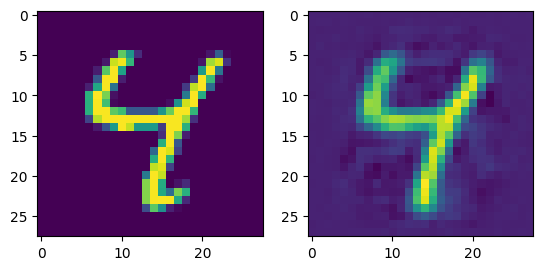

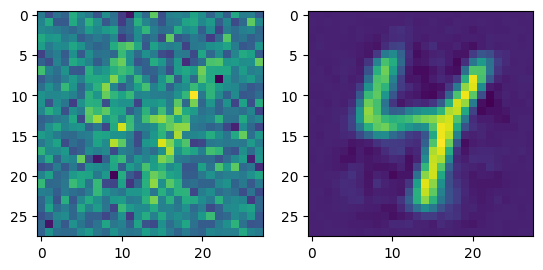

In [46]:
show_encode_decode(dnauto_enode_decode_big, test_data_xy[6][0])
show_encode_decode(dnauto_enode_decode_big, addNoise(test_data_xy[6][0]))

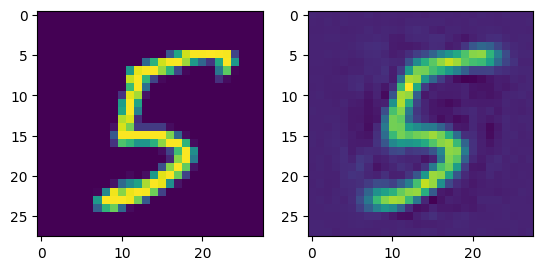

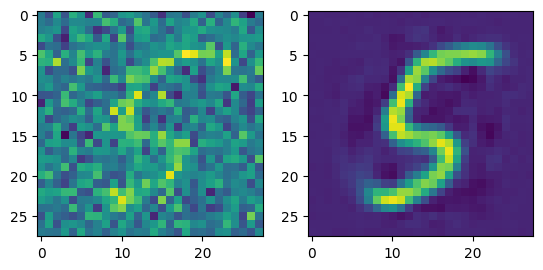

In [48]:
show_encode_decode(dnauto_enode_decode_big, test_data_xy[23][0])
show_encode_decode(dnauto_enode_decode_big, addNoise(test_data_xy[23][0]))

 # Denoising with Droupout

Adding Gaussian noise can be cumbersome because we need to figure out exactly how much noise to add, which can change from dataset to dataset. A second, more popular approach is to use dropout.

Dropout is a very simple idea: with some probability p, zero out any given feature value. This forces the network to be robust because it can never rely on any specific feature or neuron value.

Dropout is a very popular regularizer that can be applied to both the input of a network and to the hidden layers.

In [50]:
dn_auto_encoder_dropout = nn.Sequential(
    nn.Flatten(),
    nn.Dropout(p=0.2),
    get_layer(D,D*2),
    nn.Dropout(),
    get_layer(D*2,D*2),
    nn.Dropout(),
    get_layer(D*2,D*2),
    nn.Dropout(),
    nn.Linear(D*2,D*2)
)

dn_auto_decoder_dropout = nn.Sequential(
    get_layer(D*2,D*2),
    nn.Dropout(),
    get_layer(D*2,D*2),
    nn.Dropout(),
    get_layer(D*2,D*2),
    nn.Dropout(),
    nn.Linear(D*2,D),
    View(-1,1,28,28)
)

In [51]:
dn_auto_encode_decode_dropout = nn.Sequential(
    dn_auto_encoder_dropout,
    dn_auto_decoder_dropout
)

In [52]:
train_network(dn_auto_encode_decode_dropout, loss_func=nn.MSELoss(),
            train_loader=train_loader, test_loader=test_loader, epochs=10, device=device)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

Training:   0%|          | 0/469 [00:00<?, ?it/s]

Testing:   0%|          | 0/79 [00:00<?, ?it/s]

,epoch,total time,train loss,test loss
0,0,19.275947,0.063614,0.035203
1,1,36.465116,0.037619,0.027491
2,2,53.806155,0.033533,0.024511
3,3,71.131315,0.031320,0.023198
4,4,88.471270,0.030214,0.021476
5,5,106.343970,0.028831,0.020121
6,6,124.819182,0.028388,0.019466
7,7,143.098260,0.027564,0.018984
8,8,161.133357,0.027221,0.018535
9,9,178.780129,0.026887,0.018373


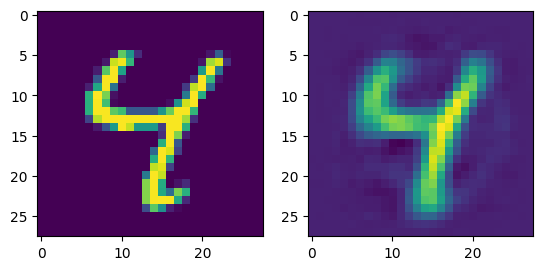

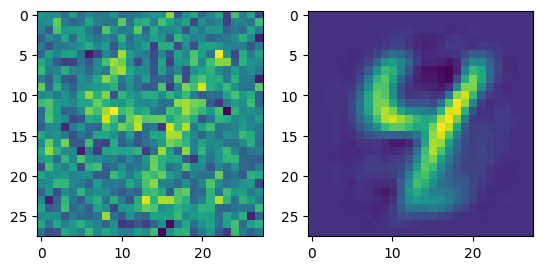

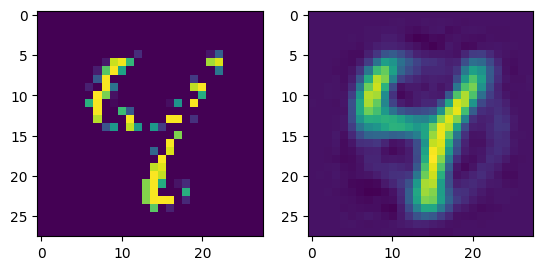

In [53]:
# x input and output with dropout 
show_encode_decode(dn_auto_encode_decode_dropout,test_data_xy[6][0])
# # x input and output with noise introduced to x input and the network still figures out the output
show_encode_decode(dn_auto_encode_decode_dropout,addNoise(test_data_xy[6][0]))
# # x input and output with dropout applied to x input 
show_encode_decode(dn_auto_encode_decode_dropout,nn.Dropout()(test_data_xy[6][0]))